Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**INSTALLING PACKAGES**

In [1]:
## we start by importing the necessary libraries for data manipulation and viz
## !pip install seaborn
## !pip install statsmodels

from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline 
# Esse comando serve para plotar os gráficos estáticos logo abaixo da célula,

# existem outras configurações do %matplolib que podem mostrar os gráficos em outras abas ou gráficos dinâmicos.
# Por padrão, desde a versão 3.7 do python anaconda, a configuração padrão do %matplotlib já é o inline.
# https://ipython.readthedocs.io/en/stable/interactive/plotting.html


In [2]:
## adding some ML capabilities with Scikit-learn
## !pip install scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


**IMPORTING DATASET**

**COLUMNS DESCRIPTION**

. passengerid = ID do passageiro do navio (código primário).

. survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.

. pclass = Tipo de classe de passagem (Do 1 ao 3), (1 = 1st, 2 = 2nd, 3 = 3rd).

. name = Nome do passageiro

. sex = Gênero do passageiro, sendo masculino e feminino.

. age = Idade do passageiro na data da ocorrência do naufrágio.

. sibsp = Número de irmãos / cônjuges a bordo.

. parch = Número de pais / filhos a bordo.

. ticket = Código do ticket.

. fare = Valor da passagem.

. cabin = Código de identificação da Cabine.

. embarked = Local ondem o passageiro embarcou no navio: C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
# Importing the train dataset and verifying the first info
titanic = pd.read_csv('train.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#same thing for the test dataset
titanic_test = pd.read_csv('test.csv')
titanic_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


**EXPLORATORY ANALYSIS**

In [5]:
#some detail on our columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#count the NAs
titanic.isna().sum()

#isna() returns true (or 1) when the value is non existent (NaN) then we can .sum() the colum


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#or, to be more complete, let's see the proportion of NaN in each column
pd.DataFrame(
    zip(    ##zip joins two tupples
        titanic.isna().sum(),               ##first column
        titanic.isna().sum()/len(titanic)   ##second column
    ),
    columns = ['Count', 'Proportion'],
    index = titanic.columns
)

,Count,Proportion
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [8]:
#Lets see some quantitative description of our dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#our target variable is the "Survived" column. Let's see how many people survived

titanic.Survived.value_counts()/len(titanic)*100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

**INITIALIZING PRE-PROCESSING**

Starting by KDD process - Knowledge Discovery in Database

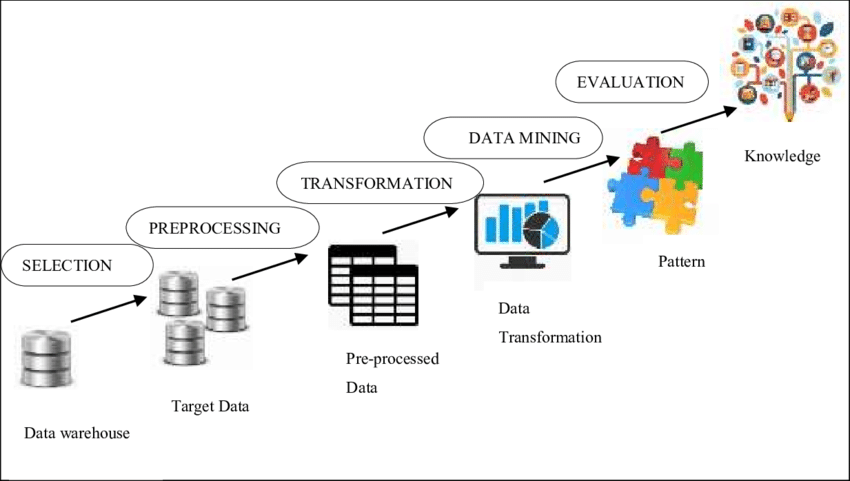

In [10]:
Image('kdd.png')

c:\Users\lsnga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


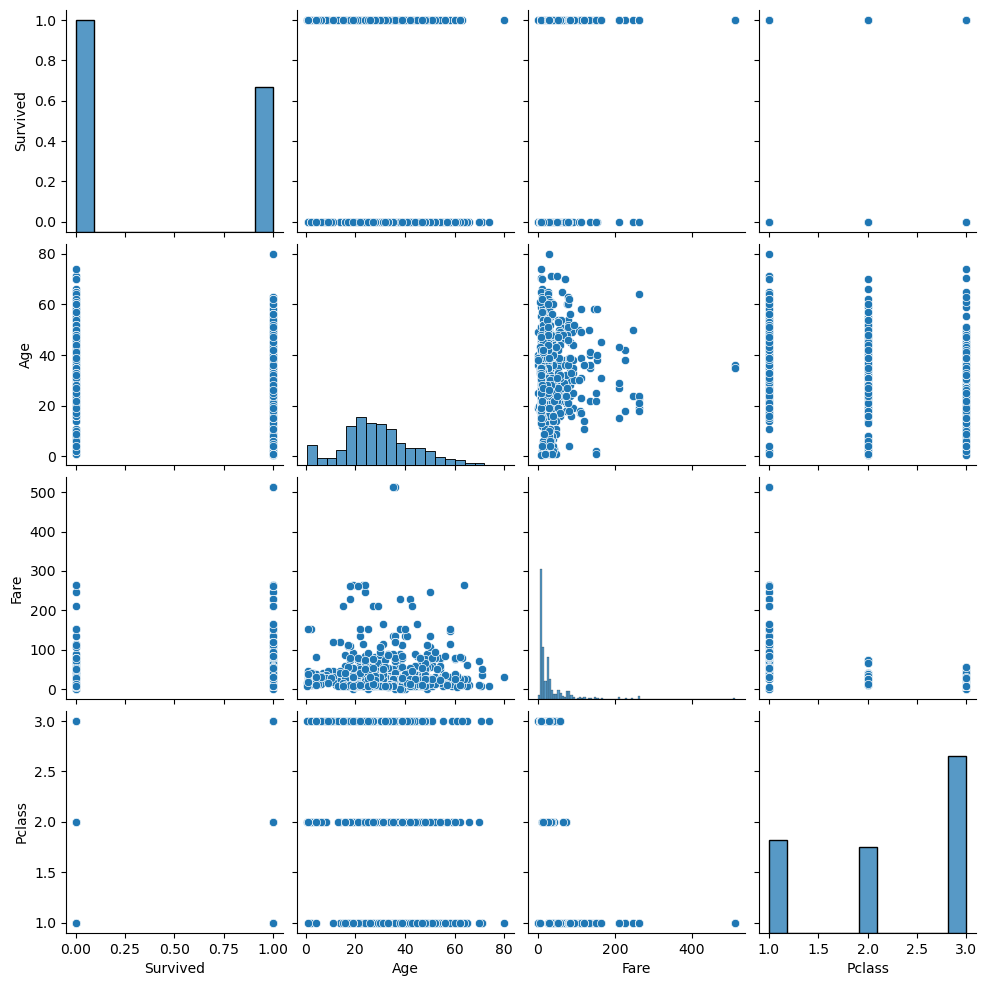

In [11]:
#I always like to start with pairplot. It shows the distribution of some variables and we can vizualise the possible correlation between them
# but in this case is not that impressive
sb.pairplot(titanic[['Survived','Age','Fare','Sex', 'Pclass']].dropna())

In [12]:
print("Seaborn version:", sb.__version__)

Seaborn version: 0.12.2


<Axes: xlabel='Fare', ylabel='Count'>

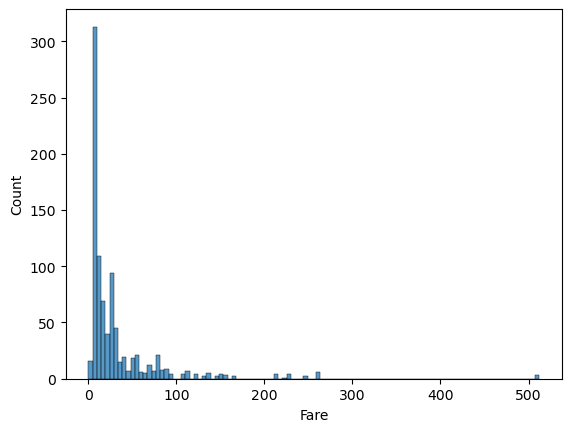

In [13]:
## lets check the variable fare

##sb.histplot(data = titanic, x="Fare")
sb.histplot(titanic['Fare'])


## seaborn is a great library for image plotting

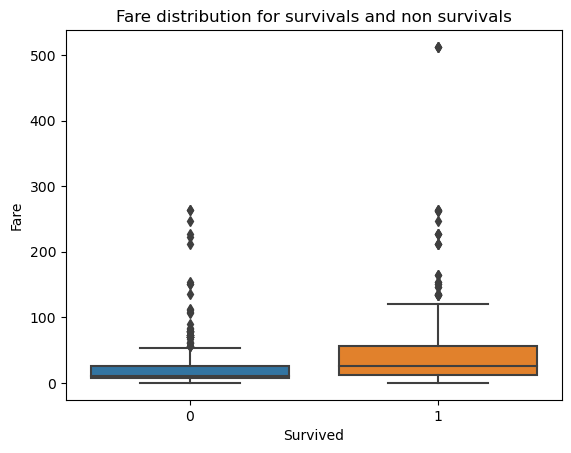

In [14]:
sb.boxplot(data = titanic, x = "Survived", y = "Fare")
plt.title("Fare distribution for survivals and non survivals")
plt.show()

In [15]:
## Let's eliminate some outliers from the "Fare" columns

titanic.loc[titanic['Fare']>=300]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [16]:
## We can truncate these three values to the maximum of Fare = 300

titanic.loc[titanic['Fare']>=300, 'Fare'] = 300

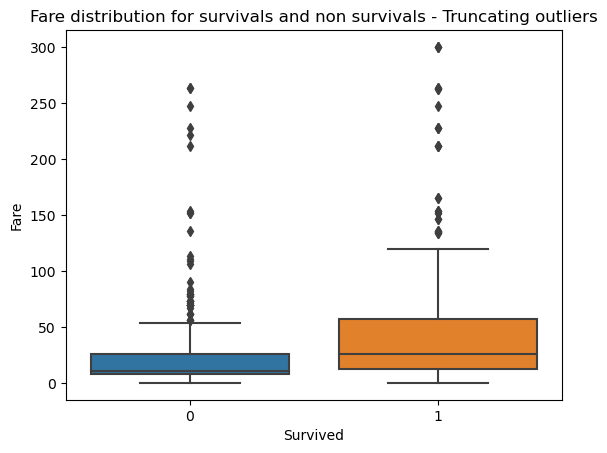

In [17]:
#repeating the same plot as before
sb.boxplot(data = titanic, x = "Survived", y = "Fare")
plt.title("Fare distribution for survivals and non survivals - Truncating outliers")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

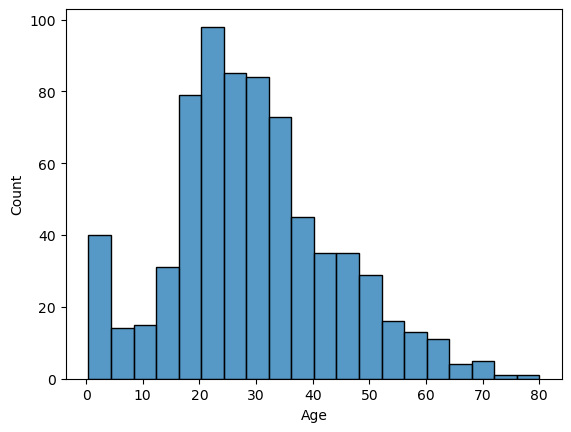

In [18]:
#evaluating the age of passengers

sb.histplot(data = titanic, x = 'Age')

<Axes: xlabel='Survived', ylabel='Age'>

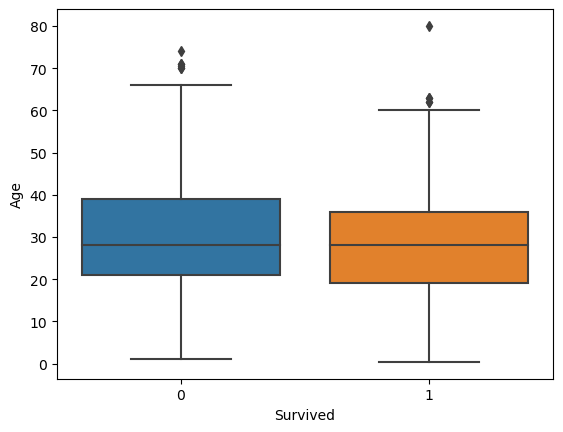

In [19]:
sb.boxplot(data = titanic, y = 'Age', x = 'Survived')

**SUSBSTITUTING NaN VALUES**

In [40]:
## Completing NaN values
print('Age info:\nAverage= {} \nMedian = {}'.format(titanic['Age'].mean(), titanic['Age'].median()))

Age info:
Average= 29.69911764705882 
Median = 28.0


In [44]:
## evaluating for sex
C_median = titanic['Age'].groupby(by= titanic.Sex).median()

C_median

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [46]:
## evaluating for class
C_median = titanic['Age'].groupby(by= titanic.Pclass).median()

C_median

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [53]:
#We will find the mean age for each class/sex group

trainMeans = titanic.groupby(['Sex','Pclass'])['Age'].mean()

trainMeans

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [61]:
## Applying the averages

def age_estimate(x):
    if not np.isnan(x['Age']):                  ## if age is not NaN
        return x['Age']                         ## return itself (the age)
    return trainMeans[x["Sex"], x['Pclass']]    ## otherwise retuns the age calculated in the trainMeans formula


titanic['Age'] = titanic.apply(age_estimate, axis=1)

In [62]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,31.489295
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,43.973014
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,300.000000
